<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" width="350"/>
</div> 

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
## SEM2 2022/3

### CS6462 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
March 7th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Siddharth
### Student Surname: Prince
### Student ID: 23052058
### Date of Final Submission: 31/03/2024
***

## Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures. 
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity. 

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

#### Problem description:
- Need to find the **quality of the letter of recommendation** which is the *observation* here.
- There are 4 independent random variables:
  1. intelligence, **I** (high, low)
  2. module difficulty, **D** (easy, hard)
  3. health status, **H** (healthy, sick)
  4. forum activity, **F** (not active, active)
- The two dependent variables are:
  1. grade, **G** (A, B, C) dependent on
     - intelligence
     - module difficulty
     - health
  2. recommendation letter quality, **R** (weak, strong) dependent on
     - grade
     - forum activity

### Step 1.2. Draw and show the DAG (7%)

The below DAG was drawn using the [Daggity online tool](https://www.dagitty.net/).

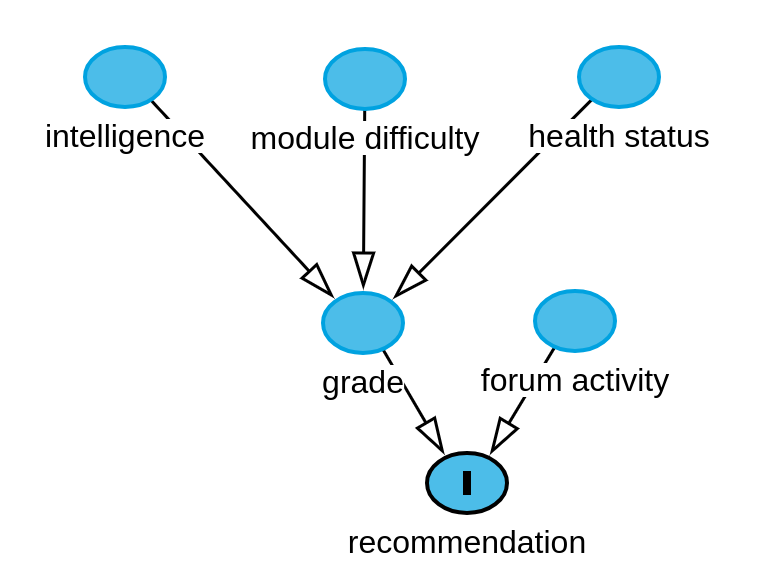

In [1]:
from IPython.display import Image

Image('./DAG.png')

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

model = BayesianNetwork([('intelligence', 'grade'), ('module_difficulty', 'grade'), ('health_status', 'grade'),
                         ('grade', 'recommendation'), ('forum_activity', 'recommendation')])
# model = BayesianNetwork()

In [3]:
model.nodes()

NodeView(('intelligence', 'grade', 'module_difficulty', 'health_status', 'recommendation', 'forum_activity'))

In [4]:
model.edges()

OutEdgeView([('intelligence', 'grade'), ('grade', 'recommendation'), ('module_difficulty', 'grade'), ('health_status', 'grade'), ('forum_activity', 'recommendation')])

### Step 1.4. Show the DAG of the Bayesian Network (1%)

**Note:** I faced a StopIteration error which happened due to a change in how the networkx module worked in the latest versions. We need to manually add the positional parameter to the draw method as a circular layout as seen in the stackoverflow post linked below.  
[Stackoverflow reference](https://stackoverflow.com/a/71698804/5584011)

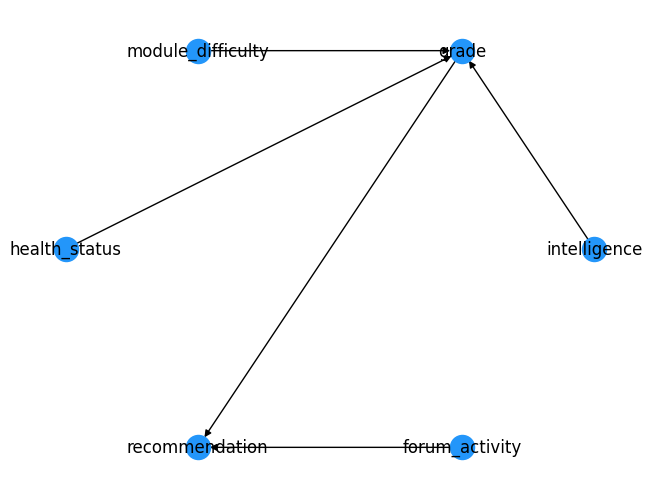

In [5]:
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_color='#2396fa')
plt.show()

We can see that the required nodes and edges have been created in the graph model. The edges are also pointing in the correct directions as the dependencies defined.

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

In [6]:
#**** define the Conditional Probability Distributions (CPDs)

# define CPD for student's intelligence, I
#
cpd_intelligence = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="intelligence",

    # define the cardinality of the variable domain, i.e., binary = 2 -> domain = {yes, no} 
    variable_card=2,
    
    # define the distribution table 
    # values are ordered following the domain {high, low}
    # e.g., P (intelligence=high) = 0.3; P (intelligence=low) = 0.7 
    values=[[0.3], [0.7]] 
)    

# define CPD for module_difficulty, D
cpd_module_difficulty = TabularCPD (
    variable="module_difficulty",
    variable_card=2,
    values=[[0.6], [0.4]] # P(module_difficulty=easy) = 0.6, P(module_difficulty=hard)=0.4
)

# define CPD for health_status, H
cpd_health_status = TabularCPD (
    variable="health_status",
    variable_card=2,
    values=[[0.2], [0.8]] # P(health_status=healthy) = 0.8, P(health_status=sick)=0.2
)

# define CPD for grade, G
cpd_grade = TabularCPD (
    variable="grade",
    variable_card=3,

    # define the distribution table 
    # 
    # this distrbution table includes values for all the combinations of the values 
    # held by the variables that condition this variable
    #
    # intelligence = I, module_difficulty = D, health_status = H, grade = G
    # G=A => {[I=high,D=easy,H=healthy],[I=high,D=easy,H=sick],[I=high,D=hard,H=healthy],[I=high,D=hard,H=sick],
    #         [I=low,D=easy,H=healthy],[I=low,D=easy,H=sick],[I=low,D=hard,H=healthy],[I=low,D=hard,H=sick]}
    # G=B => {[I=high,D=easy,H=healthy],[I=high,D=easy,H=sick],[I=high,D=hard,H=healthy],[I=high,D=hard,H=sick],
    #         [I=low,D=easy,H=healthy],[I=low,D=easy,H=sick],[I=low,D=hard,H=healthy],[I=low,D=hard,H=sick]}
    # G=C => {[I=high,D=easy,H=healthy],[I=high,D=easy,H=sick],[I=high,D=hard,H=healthy],[I=high,D=hard,H=sick],
    #         [I=low,D=easy,H=healthy],[I=low,D=easy,H=sick],[I=low,D=hard,H=healthy],[I=low,D=hard,H=sick]}
    # G=A + G=B + G=C = 1 
    #    
    values=[[0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1], # grade=A 
            [0.3, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.4], # grade=B
            [0.2, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5]], # grade=C

    # define the evidences - one of the causes must be true 
    evidence=["intelligence", "module_difficulty", "health_status"],
    evidence_card=[2,2,2]
) 

# define CPD for forum_activity, F
cpd_forum_activity = TabularCPD (
    variable="forum_activity",
    variable_card=2,
    values=[[0.75], [0.25]] # P(forum_activity=active)=0.75, P(forum_activity=not_active) = 0.25
)

# define CPD for recommendation letter quality, R
cpd_recommendation = TabularCPD (
    variable="recommendation",
    variable_card=2,

    # grade = G, forum_activity = F
    # R=weak => {[G=A,F=active],[G=A,F=not_active],[G=B,F=active],[G=B,F=not_active],[G=C,F=active],[G=C,F=not_active]}
    # R=strong => {[G=A,F=active],[G=A,F=not_active],[G=B,F=active],[G=B,F=not_active],[G=C,F=active],[G=C,F=not_active]}
    # R=weak + R=strong = 1 
    #    
    values=[[0.1, 0.2, 0.3, 0.4, 0.6, 0.7], # recommendation=weak 
            [0.9, 0.8, 0.7, 0.6, 0.4, 0.3]], # recommendation=strong 

    # define the evidences - one of the causes must be true 
    evidence=["grade", "forum_activity"],
    evidence_card=[3,2]
) 

### Step 2.2: Associate the distribution models with the network structure (2%)

In [7]:
# Associating the above defined probability distribution tables with the model
model.add_cpds(cpd_intelligence, cpd_module_difficulty, cpd_health_status, cpd_grade, cpd_forum_activity, cpd_recommendation)

### Step 2.3: Check the model (2%)

In [8]:
model.check_model()

True

## Step 3: Inference with the Bayesian Network (30%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (10%)

In [9]:
from pgmpy.inference import VariableElimination
 
infer = VariableElimination(model)

In [10]:
# posterior probability results
# evidence={'recommendation': 1} means recommendation = strong
posterior_p = infer.query(['grade'], evidence={'recommendation': 1})

In [11]:
print(posterior_p) # grade(0) -> grade = A

+----------+--------------+
| grade    |   phi(grade) |
+==========+==============+
| grade(0) |       0.3394 |
+----------+--------------+
| grade(1) |       0.4499 |
+----------+--------------+
| grade(2) |       0.2107 |
+----------+--------------+


#### <span style='color:#2396fa'><u>Inference:</u></span>
The posterior probability for getting a strong recommendation letter when having an A grade is **0.3394**

### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [12]:
posterior_p = infer.query(['recommendation'], evidence={})

In [13]:
print(posterior_p) # recommendation(1) -> strong

+-------------------+-----------------------+
| recommendation    |   phi(recommendation) |
+===================+=======================+
| recommendation(0) |                0.3813 |
+-------------------+-----------------------+
| recommendation(1) |                0.6187 |
+-------------------+-----------------------+


#### <span style='color:#2396fa'><u>Inference:</u></span>
The posterior probability for getting a strong recommendation letter with no evidence is **0.6187**.

### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [14]:
# evidence={'forum_activity': 1} means forum_activity = not_active
posterior_p = infer.query(['recommendation'], evidence={'forum_activity': 1})

In [15]:
print(posterior_p)

+-------------------+-----------------------+
| recommendation    |   phi(recommendation) |
+===================+=======================+
| recommendation(0) |                0.4563 |
+-------------------+-----------------------+
| recommendation(1) |                0.5437 |
+-------------------+-----------------------+


In [16]:
# evidence={'forum_activity': 1} means forum_activity = not_active
# evidence={'grade': 0} means grade = A
posterior_p = infer.query(['recommendation'], evidence={'forum_activity': 1, 'grade': 0})

In [17]:
print(posterior_p)

+-------------------+-----------------------+
| recommendation    |   phi(recommendation) |
+===================+=======================+
| recommendation(0) |                0.2000 |
+-------------------+-----------------------+
| recommendation(1) |                0.8000 |
+-------------------+-----------------------+


In [18]:
# evidence={'forum_activity': 1} means forum_activity = not_active
# evidence={'grade': 1} means grade = B
posterior_p = infer.query(['recommendation'], evidence={'forum_activity': 1, 'grade': 1})

In [19]:
print(posterior_p)

+-------------------+-----------------------+
| recommendation    |   phi(recommendation) |
+===================+=======================+
| recommendation(0) |                0.4000 |
+-------------------+-----------------------+
| recommendation(1) |                0.6000 |
+-------------------+-----------------------+


In [20]:
# evidence={'forum_activity': 1} means forum_activity = not_active
# evidence={'grade': 2} means grade = C
posterior_p = infer.query(['recommendation'], evidence={'forum_activity': 1, 'grade': 2})

In [21]:
print(posterior_p)

+-------------------+-----------------------+
| recommendation    |   phi(recommendation) |
+===================+=======================+
| recommendation(0) |                0.7000 |
+-------------------+-----------------------+
| recommendation(1) |                0.3000 |
+-------------------+-----------------------+


#### <span style='color:#2396fa'><u>Inference:</u></span>
- The posterior probability for getting a strong recommendation letter with weak forum activity and no other supporting evidence is **0.5437**. This implies that with the probability distribution defined earlier, the forum activity affects the outcome variable more or less evenly.
- The other probabilities for getting a strong recommendation letter with weak forum activity and also with the student grade given as supporting evidence is as follows:
  - grade = A => 0.8
  - grade = B => 0.6
  - grade = C => 0.3
Thus the grades do have a more significant influence on the final outcome. Also, the probability of weak forum activity was defined as 0.25.